# Uge 6: Ekstremum og Optimering

In [20]:
from sympy import*
from dtumathtools import*
import matplotlib.pyplot as plt
import numpy as np
from taylor import *
init_printing()

## Opgaver -- Store Dag

### 1: Stationære punkter og ekstremumsværdier 

En funktion $f: \mathbb{R}^2 \to \mathbb{R}$ er givet ved

\begin{equation*}
  f(x,y)=xy(2-x-y)+1
\end{equation*}

#### Spørgsmål a. Håndregning

Find samtlige stationære punkter for $f$. Udregn  funktionsværdien i alle stationære punkter.

#### Svar
For at finde de stationære punkter til $f(x,y)$ skal vi løse følgende:
$$
\nabla f(x,y) = 0 \Leftrightarrow \nabla f(x,y) = 
\begin{bmatrix} 
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}
\end{bmatrix} = 
\begin{bmatrix} 
0 & 0
\end{bmatrix}
$$

Vi har funktionen:
$$
f(x,y) = xy(2 - x - y) + 1 = 2xy - x^2y - y^2x + 1
$$
Udregner vi de partielle afledede:

$$
f_x = y(2 - x - y) + xy(-1) = y(2 - x - y) - xy = y(2 - 2x - y)
$$

$$
f_y = x(2 - x - y) + xy(-1) = x(2 - x - y) - xy = x(2 - x - 2y)
$$

Vi skal nu løse ligningerne:
$$
y(2 - 2x - y) = 0 \quad \text{og} \quad x(2 - x - 2y) = 0
$$

Den første ligning $y(2 - 2x - y) = 0$ giver to muligheder:
1. $y = 0$
2. $2 - 2x - y = 0 \Rightarrow y = 2 - 2x$

Den anden ligning $x(2 - x - 2y) = 0$ giver to muligheder:
1. $x = 0$
2. $2 - x - 2y = 0 \Rightarrow x = 2 - 2y$

### Bestemmelse af stationære punkter

**Case 1: $y = 0$**  
Indsætter i $x(2 - x - 2y) = 0$:

$$
x(2 - x) = 0
$$

$$
x = 0 \quad \text{eller} \quad x = 2
$$

Giver punkterne: $(0,0)$ og $(2,0)$.

**Case 2: $x = 0$**  
Indsætter i $y(2 - 2x - y) = 0$:

$$
y(2 - y) = 0
$$

$$
y = 0 \quad \text{eller} \quad y = 2
$$

Giver punkterne: $(0,0)$ (allerede fundet) og $(0,2)$.

**Case 3: $y = 2 - 2x$ og $x = 2 - 2y$**  
Sætter $y = 2 - 2x$ i $x = 2 - 2y$:

$$
x = 2 - 2(2 - 2x)
$$

$$
x = 2 - 4 + 4x
$$

$$
x - 4x = -2
$$

$$
-3x = -2
$$

$$
x = \frac{2}{3}
$$

Indsætter i $y = 2 - 2x$:

$$
y = 2 - 2 \cdot \frac{2}{3}
$$

$$
y = 2 - \frac{4}{3}
$$

$$
y = \frac{6}{3} - \frac{4}{3} = \frac{2}{3}
$$

Giver punktet $\left(\frac{2}{3}, \frac{2}{3} \right)$.

**Funktionsværdier i de stationære punkter**

- $f(0,0) = 0 \cdot 0 (2 - 0 - 0) + 1 = 1$.
- $f(2,0) = 2 \cdot 0 (2 - 2 - 0) + 1 = 1$.
- $f(0,2) = 0 \cdot 2 (2 - 0 - 2) + 1 = 1$.
- $f\left(\frac{2}{3}, \frac{2}{3}\right)$:

$$
f\left(\frac{2}{3}, \frac{2}{3}\right) = \frac{2}{3} \cdot \frac{2}{3} \left(2 - \frac{2}{3} - \frac{2}{3}\right) + 1
$$

$$
= \frac{4}{9} \left(2 - \frac{4}{3}\right) + 1
$$

$$
= \frac{4}{9} \left(\frac{6}{3} - \frac{4}{3}\right) + 1
$$

$$
= \frac{4}{9} \cdot \frac{2}{3} + 1
$$

$$
= \frac{8}{27} + 1
$$

$$
= \frac{35}{27}
$$

**Konklusion**

De stationære punkter er:

$$
(0,0), (2,0), (0,2), \left(\frac{2}{3}, \frac{2}{3}\right)
$$

Funktionsværdier:

$$
f(0,0) = 1, \quad f(2,0) = 1, \quad f(0,2) = 1, \quad f\left(\frac{2}{3}, \frac{2}{3}\right) = \frac{35}{27}
$$


#### Spørgsmål b. SymPy

Plot funktionens niveaukurver og beskriv deres form. Du behøver ikke give en præcis matematisk beskrivelse af niveaukurverne.

In [21]:
x,y = symbols('x y')
f = x*y*(2-x-y)+1
lign1 = Eq(f.diff(x),0)
lign2 = Eq(f.diff(y),0)
display(lign1,lign2)

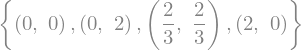

In [22]:
sols = nonlinsolve([lign1,lign2],[x,y])
sols

The following keyword arguments are unused.
* 'levels': did you mean 'clabels'?


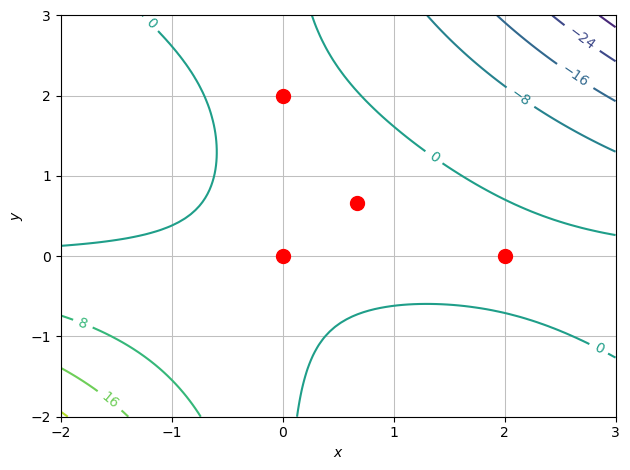

In [ ]:
# Show points
list_of_stationary_points = [(sol[0],sol[1]) for sol in sols]
s_points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"s" : 10,"color":"red"})
pf = dtuplot.plot_contour(f,(x,-2,3),(y,-2,3),show=False,levels=20, is_filled=False)
pf.extend(s_points)
pf.show()

Niveaukurverne repræsenterer linjer med konstant funktionsværdi. De steder, hvor kurverne er tættere sammen, indikerer hurtigere ændringer i funktionen.

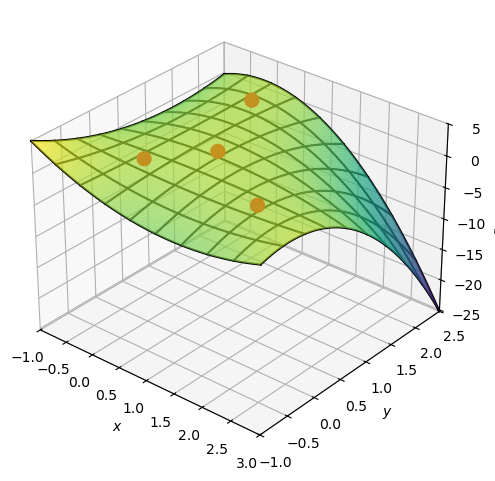

In [ ]:
# Show points
list_of_stationary_points = [Matrix([x0,y0,f.subs([(x,x0),(y,y0)])]) for (x0,y0) in sols]
s_points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"s" : 100,"color":"red"})

# Show the surface f with the stationary points
pf = dtuplot.plot3d(f,(x,-1,3),(y,-1,2.5),use_cm=True, colorbar=False,show=False,wireframe=True,rendering_kw={"alpha":0.6})
pf.camera = {"azim" : -50, "elev" : 30}
pf.extend(s_points)
pf.show()

#### Spørgsmål c

Find en parameterfremstilling $\pmb{r}(t)$, $t \in \mathbb{R}$, for en ret linje gennem et af de stationære punkter. Plot grafen for den sammensatte funktion $f \circ \pmb{r}$. 

#### Svar
$$
r(t) = (x_0, y_0) + t \cdot (a, b)
$$

In [25]:
# Jeg har valgt løsningen (2/3,2/3) og en retning (-1,1)
t = symbols('t')
r = Matrix([0,2*t])
r

In [26]:
# Vi indsætter r i f
f_r_t = f.subs({x: r[0], y: r[1]}).simplify()
f_r_t

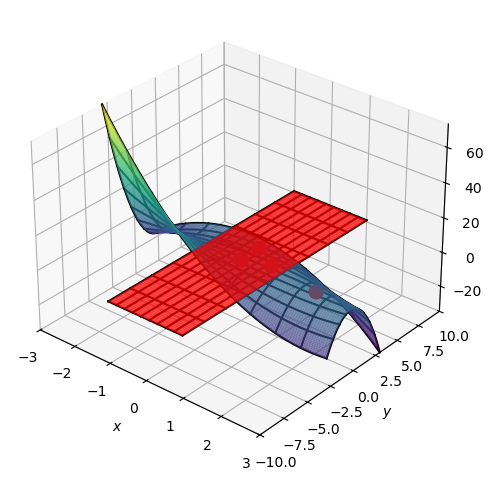

In [ ]:
# Parameterized line
t = Symbol("t")
r = (0, 2 * t)

f_t = f.subs({x: r[0], y: r[1]}).simplify()

line = dtuplot.plot3d(f_t, (t, -1,1), use_cm=True, colorbar=False, show=False, wireframe=True,
                      rendering_kw={"alpha": 0.6})

# Show the surface f with the stationary points
pf = dtuplot.plot3d(f, (x, -3, 3), (y, -3, 3), use_cm=True, colorbar=False, show=False, wireframe=True,
                    rendering_kw={"alpha": 0.6})
pf.camera = {"azim": -50, "elev": 30}
pf.extend(s_points)
pf.extend(line)
pf.show()

#### Spørgsmål d

Gentag opgaven fra Spørgsmål c, hvor du vælger en anden ret linje gennem et af de stationære punkter.

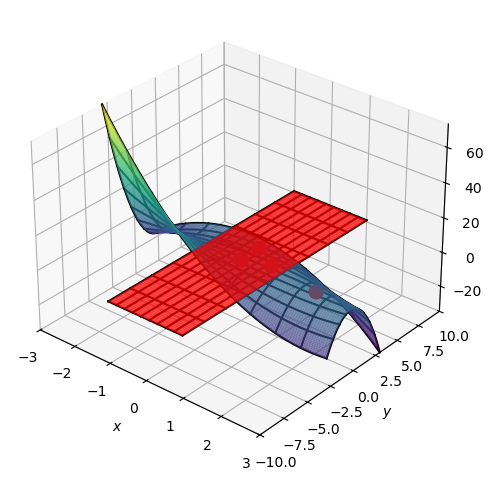

In [ ]:
# Parameterized line
t = Symbol("t")
r = (0, 2/3 * t)

f_t = f.subs({x: r[0], y: r[1]}).simplify()

line = dtuplot.plot3d(f_t, (t, -1,1), use_cm=True, colorbar=False, show=False, wireframe=True,
                      rendering_kw={"alpha": 0.6})

# Show the surface f with the stationary points
pf = dtuplot.plot3d(f, (x, -3, 3), (y, -3, 3), use_cm=True, colorbar=False, show=False, wireframe=True,
                    rendering_kw={"alpha": 0.6})
pf.camera = {"azim": -50, "elev": 30}
pf.extend(s_points)
pf.extend(line)
pf.show()

#### Spørgsmål e

Vi vil på [LilleDag](week06:lille-dag) lære metoder til at afgøre om stationære punkter er maksimumspunkter, minimumspunkter eller ingen af delene. Baseret på hvad du ved om funktionen, fx fra dine plots, skal du her blot lave et kvalificeret gæt på, om de fundne stationære punkter er maksimumspunkter, minimumspunkter eller ingen af delene.

#### Svar
Mit gæt er at to er saddel og to er maximum.

### 2: Tilbage til Tema 1

I [](tema:1) betragtede vi tre funktioner af formen $f_i: \mathbb{R}^2 \to \mathbb{R}$. Alle funktionerne havde præcist et minimum, men ikke noget maksimum da de voksede mod uendeligt. Du må bruge denne oplysning uden bevis. 

Vi bruger her funktionerne (med deres standardværdier) givet i Python ved:

In [29]:
# Variable og parameter der ingår i funktionerne
x1, x2 = symbols('x1 x2', real=True)
a, lambda1 = symbols('a lambda1',  positive=True)

In [30]:
def f1(x1, x2, a = S(1/2)):
    return a * x1**2 + 1 * x2**2

def f2(x1, x2, lambda1 = 0.5):
    Q = 1/sqrt(2) * Matrix([[1,1],[1,-1]])
    A = Q.T * Matrix([[lambda1,0],[0,1]]) * Q
    b = Matrix([-2,4])
    x = Matrix([x1,x2])
    q = x.T * A * x + x.T * b
    return q[0]

def f3(x1, x2):
    return (1 - x1)**2 + 100*(x2 - x1**2)**2

I tema-øvelsen brugte vi gradient-metoden til at lede efter minimumspunktet og minimumsværdien. Det er en god metode fx når funktionen har mange (evt uendeligt mange) punkter hvor den ikke er differentiabel, men for pæne funktioner (fx funktioner der er uendeligt ofte differentiable) som de tre betragtede funktioner, er det meget nemmere blot at finde de punkter hvor gradienten er lig med nulvektoren.  

Find alle stationære punkter og den tilhørende minimumsværdi for hver af de tre funktioner. *Selvom funktionerne er givet i Python må du gerne regne denne opgave i hånden -- det tager ikke længere tid.* 

Angiv billedmængden for hver funktion.

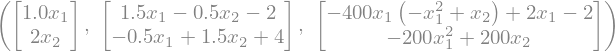

In [31]:
# finder nabla_fn
nabla_f1 = Matrix([diff(f1(x1,x2),x1), diff(f1(x1,x2),x2)])
nabla_f2 = Matrix([diff(f2(x1,x2),x1), diff(f2(x1,x2),x2)])
nabla_f3 = Matrix([diff(f3(x1,x2),x1), diff(f3(x1,x2),x2)])
nabla_f1, nabla_f2, nabla_f3

In [32]:
# Vi løser nu dem alle tre
sols_f1 = nonlinsolve(nabla_f1, [x1,x2])
sols_f2 = nonlinsolve(nabla_f2, [x1,x2])
sols_f3 = nonlinsolve(nabla_f3, [x1,x2])
sols_f1, sols_f2, sols_f3

In [33]:
# Vi kan nu bruge dette til at finde de tilsvarende minimumsværdier
f1_min = f1(sols_f1.args[0][0],sols_f1.args[0][1])
f2_min = f2(sols_f2.args[0][0],sols_f2.args[0][1])
f3_min = f3(sols_f3.args[0][0],sols_f3.args[0][1])
f1_min, f2_min, f3_min

Vi kan nu bruge, at:
$$
im(f) = f(B) = [m,M]
$$

Vi får altså:
$$
im(f_1) = [0,\infty[ \quad im(f_2) = [-5.5,\infty[ \quad im(f_3) = [0,\infty[
$$

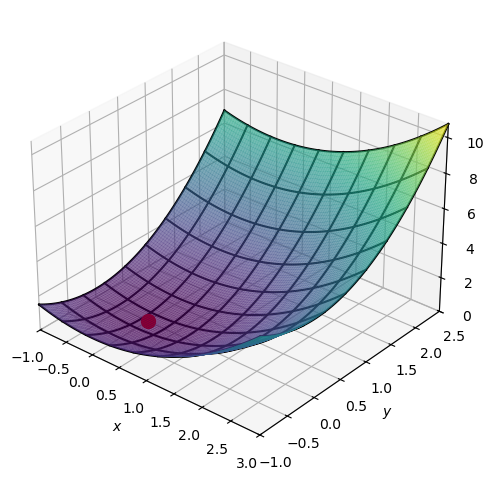

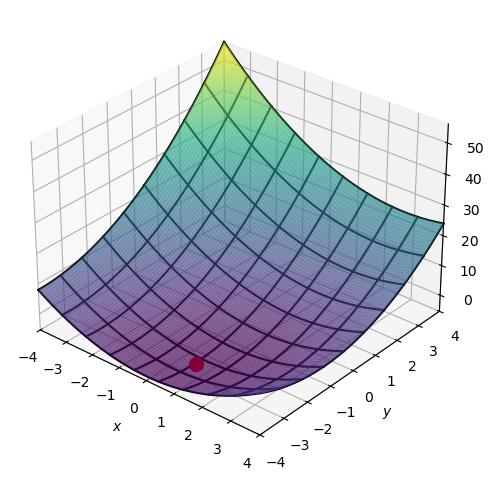

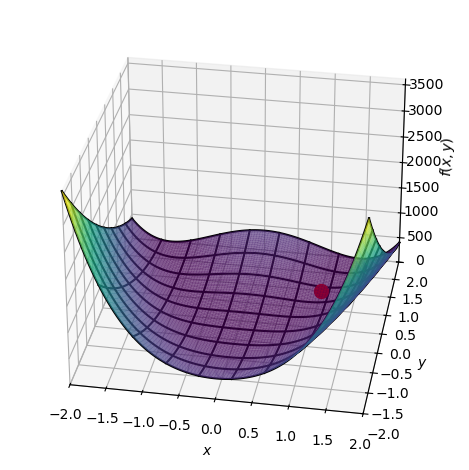

In [ ]:
x,y = symbols('x y')
# Show points
list_of_stationary_points = [Matrix([x0,y0,f1(x0,y0)]) for (x0,y0) in sols_f1]
s_points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"s" : 100,"color":"red"})

# Show the surface f with the stationary points
pf = dtuplot.plot3d(f1(x,y),(x,-1,3),(y,-1,2.5),use_cm=True, colorbar=False,show=False,wireframe=True,rendering_kw={"alpha":0.6})
pf.camera = {"azim" : -50, "elev" : 30}
pf.extend(s_points)
pf.show()

# Show points
list_of_stationary_points = [Matrix([x0,y0,f2(x0,y0)]) for (x0,y0) in sols_f2]
s_points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"s" : 100,"color":"red"})

# Show the surface f with the stationary points
pf = dtuplot.plot3d(f2(x,y),(x,-4,4),(y,-4,4),use_cm=True, colorbar=False,show=False,wireframe=True,rendering_kw={"alpha":0.6})
pf.camera = {"azim" : -50, "elev" : 30}
pf.extend(s_points)
pf.show()

# Show points
list_of_stationary_points = [Matrix([x0,y0,f3(x0,y0)]) for (x0,y0) in sols_f3]
s_points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"s" : 100,"color":"red"})

# Show the surface f with the stationary points
pf = dtuplot.plot3d(f3(x,y),(x,-2,2),(y,-2,2),use_cm=True, colorbar=False,show=False,wireframe=True,rendering_kw={"alpha":0.6})
pf.camera = {"azim" : -80, "elev" : 30}
pf.extend(s_points)
pf.show()

### 3: Ekstremum eller ej. Håndregning

Lad $f: \mathbb{R}^2 \to \mathbb{R}$ være givet ved

\begin{equation*}
  f(x,y)=x^2 y + y
\end{equation*}

Bestem samtlige lokale ekstrema for $f$.

In [35]:
x, y = symbols('x y')
f = x**2*y + y
lign1 = Eq(f.diff(x),0)
lign2 = Eq(f.diff(y),0)
display(lign1,lign2)

In [36]:
sols = nonlinsolve([lign1,lign2],[x,y])
sols

Der er ikke nogen lokale ekstrema, da imaginære løsninger ikke tæller.

### 4: En funktion der ikke er differentiabel overalt

Lad $f: \mathbb{R}^2 \to \mathbb{R}$ være givet ved

\begin{equation*}
  f(x,y)=-|x| ((y-1)^2+1)
\end{equation*}

#### Spørgsmål a

Find alle punkter hvor funktionen kan antage en ekstremumsværdi.

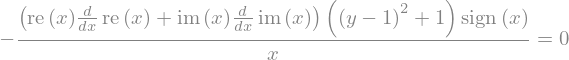

In [39]:
x,y = symbols('x y')
f = -abs(x)*((y-1)**2+1)
lign1 = Eq(f.diff(x),0)
lign2 = Eq(f.diff(y),0)
display(lign1,lign2)

In [40]:
sols = nonlinsolve([lign1,lign2],[x,y])
sols

AttributeError: 'Complexes' object has no attribute 'is_constant'

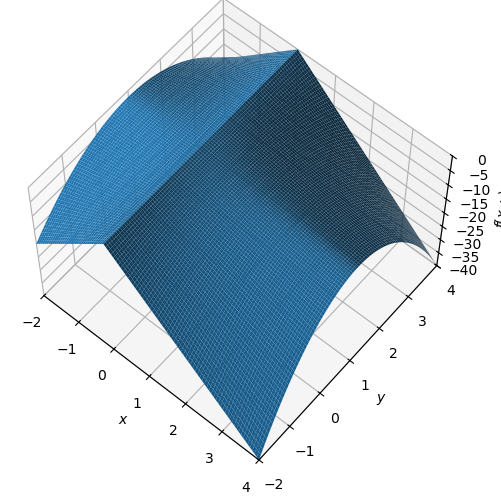

In [41]:
p1 = dtuplot.plot3d(-abs(x)*((y-1)**2+1),(x,-2,4),(y,-2,4), show=False)
p1.camera = {"azim" : -50, "elev" : 60}
p1.show()

Der er ikke nogen stationære punkter, da det er imaginære løsninger. Men da funktionen er afhængig af $(-|x|)$ vil alle punkter der ligger ved $(0,y)$ være maksimumer.

#### Spørgsmål b

Find den globale maksimums- og minimumsværdi for funktionen.

#### Svar
Langs linjen $\{(0,y) \mid y \in \mathbb{R}\}$, antager funktionen værdien 
$0$. Dette er altså maksimumsværdien. Værdimængden er $im(f) = ]-\infty,0]$ 
.

### 5: Globalt maksimum og globalt minimum

Lad $f: A \to \mathbb{R}$ være givet ved:

\begin{equation*}
  f(x,y)=xy(2-x-y)+1
\end{equation*}

hvor $A \subset \mathbb{R}^2$ betegner det område i $(x,y)$-planen hvor $x\in\left[ 0,1\right]$, og $y\in\left[ 0,1\right]$. Bemærk at funktionsforeskriften for $f$ er den samme som i [A](exercise:stationre-punkter-og-ekstremumsvrdier).

#### Spørgsmål a

Find ved håndregning samtlige stationære punkter for $f$ i det indre af $A$.

#### Svar
Fra opgave 1 fand vi, at $(0,0)$ og $(\frac{2}{3},\frac{2}{3})$ er to stationære punkter for f. Men da $(0,0)$ ligger på randen, så vil man ikke bruge denne værdi. Derfor er der kun et stationært punkt: $(\frac{2}{3},\frac{2}{3})$

#### Spørgsmål b

Bestem den globale maksimums- og minimumsværdi for $f$ samt de punkter hvori disse værdier antages.

In [42]:
x,y = symbols('x y')
f = x*y*(2-x-y)+1

# Vi laver nu en randundersøgelse af f
f_x_min = f.subs(y,0)
f_y_min = f.subs(x,0)
f_x_max = f.subs(y,1)
f_y_max = f.subs(x,1)
f_x_min, f_x_max, f_y_min, f_y_max

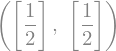

In [43]:
# Vi kan nu se at for x,y = 1 så får vi en funktion.
# For den skal vi altså bare finde maks
solve(f_x_max.diff(x)), solve(f_y_max.diff(y))

In [44]:
f.subs({x:1,y:1}), f.subs({x:0,y:0}), f.subs({x:1,y:0}), f.subs({x:0,y:1}), f.subs({x:2/3,y:2/3})

Vi har nu fundet at det globale maksimum er $\frac{35}{27}$ som blev fandt ve $(\frac{2}{3},\frac{2}{3})$. Det globale minimum er på hele linjen $(0,y)$ og $(x,0)$ samt i punktet $(1,1)$.

#### Spørgsmål c

Opgaven her handler om en differentiabel funktion af *to* variable defineret på $[0,1]^2$. Hvordan ville du gribe opgaven an, hvis den handlede om en differentiabel funktion af *fem* variable defineret på $[0,1]^5$. Diskuter en mulig fremgangsmåde. I må gerne inddrage en god AI chatbot fx https://chatgpt.com/ eller https://copilot.microsoft.com/ i diskussionen.





**Note:**
:class: dropdown
En ["terning"](https://en.wikipedia.org/wiki/Hypercube) i $\mathbb{R}^n$ har $2 \, n$ randflader og $2^n$ hjørnepunkter. Bemærk at dette er ikke nogen universel regel om "firkantede domæner" i højere dimensioner. Fx: En ["diamant/oktaeder"](https://en.wikipedia.org/wiki/Cross-polytope) i $\mathbb{R}^n$, som er givet ved $|x_1|+ |x_2| + \cdots + |x_n| \le 1$, har omvendt $2^ n$ randflader og $2 \, n$ hjørnepunkter.

#### Spørgsmål d

Bestem værdimængden af $f$.

#### Spørgsmål e

Plot grafen for $f$ sammen med punkter der viser hvor på grafen største- og mindsteværdien antages, og tjek at dine resultater ser fornuftige ud.

### 6: Globalt maksimum og globalt minimum igen

Betragt funktionen $f:\mathbb{R}^2\rightarrow\mathbb{R}$ givet ved

\begin{equation*}
  f(x,y)=x^2-3y^2-3xy
\end{equation*}

samt mængden $A=\lbrace(x,y) \in \mathbb{R}^2 \,| \, x^2+y^2\leq 1\rbrace$.


Gør rede for, at $f$ har både et globalt maksimum og et globalt minimum på $A$ og bestem disse værdier samt de punkter hvori de antages.

### 7: Stationære punkter for kvadratiske former

Lad $q : \mathbb{R}^n \to \mathbb{R}$ være en kvadratisk form. Men andre ord: $q$ har funktionsforeskriften 

\begin{equation*}
   q(\pmb{x}) = \pmb{x}^T A \pmb{x} + \pmb{x}^T \pmb{b} + c
\end{equation*}

hvor $A$ er en $n \times n$ matrix (og ikke nulmatricen), $\pmb{b} \in \mathbb{R}^n$ er en søjlevektor og $c \in \mathbb{R}$.

Der gælder at $q$ er en differentiabel funktion med $\nabla q(\pmb{x}) = (A + A^T) \pmb{x} + \pmb{b}$ i følge <a href="../_assets/textbook_mat1b_en.pdf#example:quad_diff">dette eksempel</a>. Dette skal ikke vises (før den sidste opgave).

#### Spørgsmål a

Opskriv et system af ligninger hvis løsning beskriver de stationære punkter. Argumenter for at $q$ kan have enten nul, et eller uendeligt mange stationære punkter.

#### Spørgsmål b

Antag at $(A + A^T)$ er invertibel. Argumenter for at $q$ har netop et stationært punkt. Find det stationære punkt (du skal altså finde en formel eller udtryk for det stationære punkt).

#### Spørgsmål c

Antag $A$ er symmetrisk. Argumenter for at $q$ har netop ét stationært punkt hvis og kun hvis $\lambda=0$ ikke er en egenværdi for $A$.

#### Spørgsmål d (valgfri)

Udled formlen som vi startede med at tage for givet: $\nabla q(\pmb{x}) = (A + A^T) \pmb{x} + \pmb{b}$

### 8: En udfordring i lineær algebra

Lad $A$ være en $n \times n$ matrix. Gælder der at den symmetriske matrix $(A + A^T)$ er *invertibel*, hvis $A$ er *invertibel*? Bevis det eller giv et modeksempel!

___

## Opgaver -- Lille Dag

### 1: Anvendelse af Hessematrix. Håndregning.

Betragt funktionen $f:\mathbb{R}^2\rightarrow\mathbb{R}$ givet ved

\begin{equation*}
  f(x,y)=x^2+4y^2-2x-4y
\end{equation*}

#### Spørgsmål a

Gør rede for at funktionen $f$ har netop ét ekstremum, bestem ekstremumspunktet og ekstremumsværdien.

#### Svar
For at gøre dette vil vi først opskrive $\nabla f(x,y)$: 
$$
\nabla f(x,y) = 
\begin{bmatrix}
2x - 2 \\
8y - 4
\end{bmatrix}
$$
Vi løser nu $\nabla f(x,y) = 0$
$$
2x - 2 = 0 \land 8y - 4 = 0 \Leftrightarrow x = 1 \land y = \frac{1}{2}
$$

Vi kan nu skrive hexian matrix op
$$
H_f(x,y) = \begin{bmatrix}
2 & 0 \\
0 & 8
\end{bmatrix}
$$
eigenværdierne er $(2 - \lambda)(8-\lambda)$ altså $2 \land 8$

Baseret på theorem 5.2.4 har vi at det er et globalt minimum, som ligget i punktet $(1,\frac{1}{2}) = -2$

#### Spørgsmål b

Hvad er forskellen mellem et ekstremum og et egentligt ekstremum (eng: *strict extremum*)? Er det fundne ekstremum et egentligt ekstremum?

#### Svar
Vi har reglen:

$x_0 \in A$  
lokalt minimum hvis  
$$
\|x - x_0\| < \varepsilon \Rightarrow f(x_0) \leq f(x)
$$
$x_0 \in A$  
egentlig lokalt min. hvis  
$$
x \neq x_0, \|x - x_0\| < \varepsilon \Rightarrow f(x_0) < f(x)
$$

Og igen ud fra theorem 5.2.4 har vi at det er et strict globalt minimum.

### 2: Lokale ekstrema og approksimerende andengradspolynomium

Givet funktionen $f:\mathbb{R}^2\rightarrow\mathbb{R}$ med forskriften 

\begin{equation*}
  f(x,y)=x^3+2y^3+3xy^2-3x^2.
\end{equation*}

#### Spørgsmål a

Vis at punkterne $A=(2,0)$, $B=(1,-1)$ og $C=(0,0)$ er stationære punkter for $f$ og afgør for hvert af dem om der er et lokalt maksimumspunkt eller lokalt minimumspunkt. Angiv i givet fald den lokale maksimumsværdi/minimumsværdi, og afgør om den er egentlig (eng: strict).

In [74]:
# Vi finder alle stationære punkter
x,y = symbols('x y')
f = x**3 + 2*y**3 + 3*x*y**2 - 3*x**2
lign1 = Eq(f.diff(x),0)
lign2 = Eq(f.diff(y),0)
display(lign1,lign2)

In [75]:
s_points = nonlinsolve([lign1,lign2],[x,y])
s_points

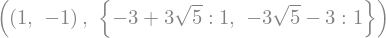

In [76]:
# Vi finder Hesse matricen og egenværdierne
H = dtutools.hessian(f,[x,y])
Hesse_matricer = [H.subs([(x,x0),(y,y0)]) for x0,y0 in s_points]
Eig_Hesse_matricer = [h.eigenvals() for h in Hesse_matricer]

display(*zip(s_points,Eig_Hesse_matricer))

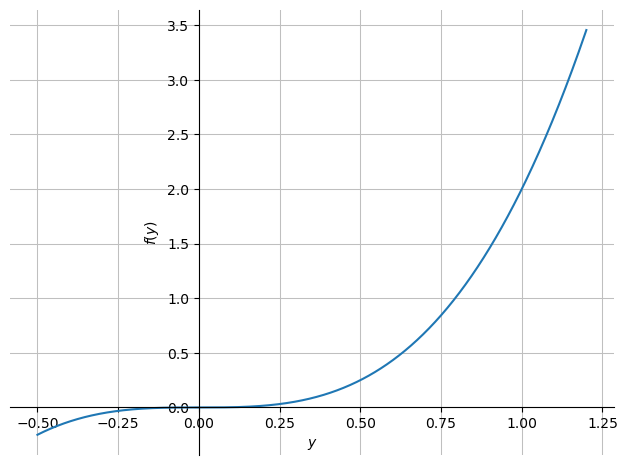

In [133]:
# Vi laver nu en undersøgelse af det første punkt (0,0)
# med eigenværdier -6 og 0, da det følger den 4 i theorem 5.2.4
tmp = f.subs(x,0) - f.subs([(x,0),(y,0)])
display(tmp, tmp.factor())
# vi plotter dette
dtuplot.plot(tmp,(y,-0.5,1.2),axis_center="auto")
solve(tmp)

Her har vi:
$$
f(x,x) - f(0,0) > 0 \text{ når } x > 0
$$
og
$$
f(x,x) - f(0,0) \leq 0 \text{ når } x < 0
$$
**Da $f(x,x)$ antager værdier der både er større og mindre end $f(0,0)$ for $(x,x)$ virkårligt tæt på $(0,0)$, kan $f$ ikke have ekstremum i $(0,0)$.**

Vi har nu vist at alle punkter er stationære punkter for $f$. Vi har nu punkterne der er følgende:
- A: $(2,0)$: Er er saddel punkt
- B: $(1,-1)$: Er et saddle punkt
- C: $(0,0)$: Er et normalt lokalt minimum

#### Spørgsmål b

Vis at det approksimerende andengradspolynomium for $f$ med udviklingspunktet $A$ kan skrives som en ligning i de ubekendte $x,y$ og $z$ på denne form:

\begin{equation*}
  z-c_3=\frac 12\lambda_1(x-c_1)^2+\frac 12\lambda_2(y-c_2)^2.
\end{equation*}

Hvilken flade beskriver denne ligning, og hvad angiver konstanterne?

#### Svar 

In [78]:
t = taylorN(f,[x,y],(2,0),2)
t

Vi kan nu analysere taylor polynomiet:
$$
6y^2+3(x−2)^2−4 \to 6(y-0)^2+3(x−2)^2−4
$$

Herfra kan vi aflæse, at:
- $c_1 = 2$
- $c_2 = 0$
- $c_3 = -4$

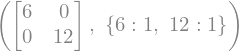

In [79]:
# Vi udregner hexian matricen
H = dtutools.hessian(f,[x,y]).subs([(x,2),(y,0)])
H, H.eigenvals()

Vi kan nu se at $6(y-0)^2+3(x−2)^2−4$ kan omskrives til formen:
\begin{equation*}
  z-c_3=\frac 12\lambda_1(x-c_1)^2+\frac 12\lambda_2(y-c_2)^2.
\end{equation*}
da
$$
z + 4 = \frac{1}{2} \cdot 6 \cdot (x-2)^2 + \frac{1}{2} \cdot 12 \cdot (y-0)^2 \Leftrightarrow z = 6(y-0)^2+3(x−2)^2−4
$$

Ligningen beskriver en opadvendt elliptisk parabloide med toppunkt $T = (c_1,c_2,c_3) = (2,0,-4)$.

#### Spørgsmål c

Tegn grafen for $f$ sammen med grafen for de approksimerende andengradspolynomier for $f$ med udviklingspunkterne $A$, $B$ og $C$. Diskutér om man ud fra egenværdierne for Hessematricerne i de tre punkter kan afgøre hvilken keglesnitsfladetype andengradspolynomierne beskriver.

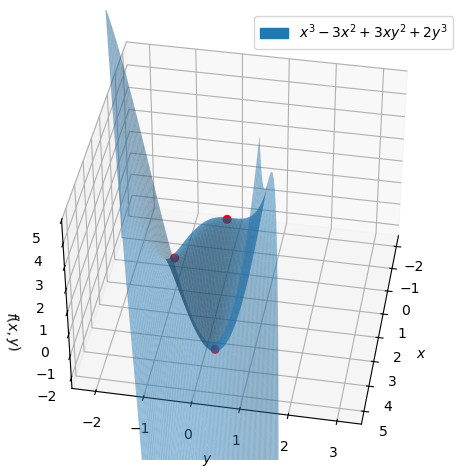

In [131]:
# Plot af funktionen og punkterne
list_of_stationary_points = [Matrix([x0,y0,f.subs([(x,x0),(y,y0)])]) for (x0,y0) in s_points]
points = dtuplot.scatter(list_of_stationary_points, show=False, rendering_kw={"color":"red", "s" : 30})
# taylorPlot = dtuplot.plot3d(t,(x,-2,2.5),(y,-2,1),xlim=(-2.5,2.5),ylim=(-2.5,2.5),zlim=(-2.5,5), show=False, rendering_kw={"alpha":0.5})

pf = dtuplot.plot3d(f,(x,-5, 2.5),(y,-2, 1),xlim=(-2.5,5.5),ylim=(-2.5,3.5),zlim=(-2.5,5), show=False, rendering_kw={"alpha":0.5})
pf.camera = {"azim" : 10, "elev" : 40}
(pf + points).show()


### 3: Tilbage til Tema 1 igen igen

Vi betragter den kvadratiske form $f_2: \mathbb{R}^2 \to \mathbb{R}$ fra [](tema:1). Den er givet ved $q: \mathbb{R}^2 \to \mathbb{R}$

\begin{equation*}
   q(\pmb{x}) = \pmb{x}^T A \pmb{x} + \pmb{b}^T \pmb{x} 
\end{equation*}

hvor $A$ er en $2 \times 2$ matrix der afhænger af $\lambda_1 \in \mathbb{R}$

\begin{equation*}
   A = Q^T \Lambda Q,  \quad Q = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}, \quad \Lambda  = \begin{bmatrix} \lambda_1 & 0 \\ 0 & 1 \end{bmatrix}
\end{equation*}

og $\pmb{b} = - 2 A [1,2]^T$. Ændringer i forhold til Tema-øvelsen: 1) $\lambda_1$ må være nul eller negativ, 2) ny definition af $\pmb{b}$.

#### Spørgsmål a. Håndregning

Find egenværdierne for $A$.

#### Svar
Vi kan bruge spectralsætningen til at aflæse, at egenværdierne er:
$$
e_1 = \lambda_1 \land e_2 = 1
$$

#### Spørgsmål b. Håndregning

Find alle stationærepunkter for $q$ når $\lambda_1 \neq 0$

#### Svar


#### Spørgsmål c

Hvordan er $A$ og Hesse-matricen $\pmb{H}_f$ relateret? Find resultatet i bogen hvis du ikke kan huske det. Beskriv det stationære punkt for hver af de tre tilfælde $\lambda_1 > 0$, $\lambda_1 = 0$ og $\lambda_1 < 0$.

#### Spørgsmål d

Hvordan er $q$ og det approksimerende andengradspolynomium (med et vilkårligt udviklingspunkt) relateret? Plot $q$ for hver af de tre tilfælde $\lambda_1 > 0$, $\lambda_1 = 0$ og $\lambda_1 < 0$. Hvilke normalformer er der tale om (jf. https://en.wikipedia.org/wiki/Quadric#Euclidean_space).

### 4: Globale ekstrema for funktion af tre variable

Vi betragter funktionen $f:\mathbb{R}^3\rightarrow \mathbb{R}$ givet ved

\begin{equation*}
  f(x,y,z)=\sin(x^2+y^2+z^2-1)-x^2+y^2-z^2.
\end{equation*}

samt den massive enhedskugle 

\begin{equation*}
  \mathcal{K}=\left\{(x,y,z)\in \mathbb{R}^3 \mid x^2+y^2+z^2\leq 1\right\}.
\end{equation*}

#### Spørgsmål a

Vis at $f$ i det indre af $\mathcal{K}$ kun har ét stationært punkt, nemlig $O=(0,0,0)$, og undersøg om $f$ har ekstremum i $O$.

#### Spørgsmål b

Bestem den globale maksimumsværdi og den globale minimumsværdi af $f$ på $\mathcal{K}$ og de punkter hvori værdierne antages.

#### Spørgsmål c

Bestem værdimængden af $f$ på $\mathcal{K}$.

### 5: Hvor er det globale maksimum? Minimum?

Givet funktionen $f:\mathbb{R}^2\rightarrow\mathbb{R}$ med forskriften 

\begin{equation*}
  f(x,y)=\exp(x^2+y^2)-4xy
\end{equation*}

Husk at $\exp(x^2+y^2) = \operatorname{e}^{x^2+y^2}$.

#### Spørgsmål a

Find samtlige stationære punkter for $f$.

#### Spørgsmål b

Find samtlige lokale ekstrema.

#### Spørgsmål c

Afgør om funktionen $f$ har et globalt maksimum eller minimum, og angiv værdierne for disse hvis de eksisterer.

#### Spørgsmål d

Angiv funktionens værdimængde.